<a href="https://colab.research.google.com/github/allmore0/tarea_1/blob/main/Lugares_entretenimiento_CDMX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Clasificación de lugares de entretenimiento en CDMX

In [37]:
# -*- coding: utf-8 -*-

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
# Creando el dataset de lugares de entretenimiento en la CDMX

data = pd.DataFrame({
    "Lugar": ["Six Flags", "Kataplum", "Inspark", "Escape Room", "SkyZone", "Granja"],
    "Precio": [500, 400, 350, 300, 250, 200],       # costo aproximado en MXN
    "Duracion": [5, 4, 2, 2, 3, 4],                 # duración promedio en horas
    "Tipo_cod": [0, 0, 1, 2, 3, 4],                 # codificación del tipo de actividad
    "Clase": [0, 0, 1, 2, 3, 4]                     # etiqueta final (categoría)
})

# Variables de entrada y salida
X = data[["Precio", "Duracion", "Tipo_cod"]].values
y = data["Clase"].values

In [39]:
# División en train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Creando el escalamiento
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definimos el modelo MLP
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

modelo = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(len(set(y)), activation='softmax')  # tanto las clases como categorías
])

adam = Adam(learning_rate=0.001)
modelo.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
# Entrenamiento con 50 épocas
history = modelo.fit(
    X_train, y_train,
    epochs=50,
    batch_size=4,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0000e+00 - loss: 1.5639 - val_accuracy: 0.0000e+00 - val_loss: 1.5501
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.2500 - loss: 1.5451 - val_accuracy: 0.0000e+00 - val_loss: 1.5654
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.2500 - loss: 1.5273 - val_accuracy: 0.0000e+00 - val_loss: 1.5789
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.2500 - loss: 1.5096 - val_accuracy: 0.0000e+00 - val_loss: 1.5897
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.2500 - loss: 1.4946 - val_accuracy: 0.0000e+00 - val_loss: 1.5993
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.2500 - loss: 1.4808 - val_accuracy: 0.0000e+00 - val_loss: 1.6086
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.5000 - loss: 1.4670 - val_accuracy: 0.0000e+00 - val_loss: 1.6158
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.5000 - loss: 1.4529 - val_accura

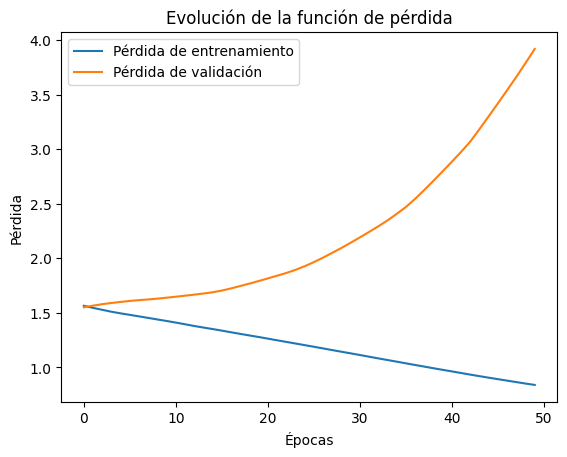

In [41]:
# Gráficas de pérdida
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Evolución de la función de pérdida')
plt.show()


Loss: 3.9183 - Accuracy: 0.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


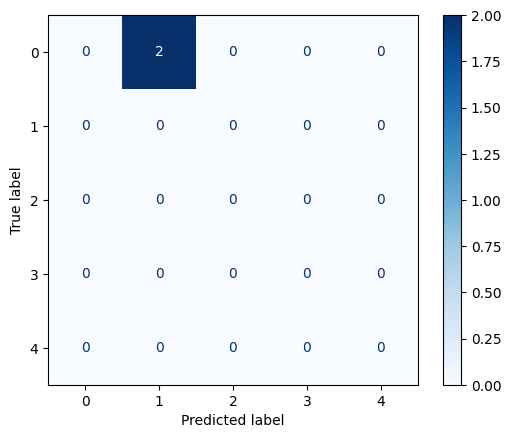


Sensitivity (Recall) por clase:
Clase 0: 0.00
Clase 1: 0.00
Clase 2: 0.00
Clase 3: 0.00
Clase 4: 0.00


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step

Evaluación de nuevo lugar:
Resultado: Clase 1


In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Evaluación del modelo
loss, acc = modelo.evaluate(X_test, y_test, verbose=0)
print(f"\nLoss: {loss:.4f} - Accuracy: {acc:.4f}")

# Matriz de confusión
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score

pred = modelo.predict(X_test)
y_pred = np.argmax(pred, axis=1)

# Get all unique classes from the original dataset
all_classes = data["Clase"].unique()

# Compute the confusion matrix for all classes, even if not present in y_test/y_pred
cm = confusion_matrix(y_test, y_pred, labels=all_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=all_classes)
disp.plot(cmap='Blues')
plt.show()

sensitivity = recall_score(y_test, y_pred, average=None, labels=all_classes)
print("\nSensitivity (Recall) por clase:")
for i, s in enumerate(sensitivity):
    print(f"Clase {all_classes[i]}: {s:.2f}")

# Se muestra la predicción de un nuevo lugar
nuevo_lugar = np.array([[320, 3, 2]])  # Ejemplo: Escape Room similar
nuevo_lugar_scaled = scaler.transform(nuevo_lugar)
pred_nuevo = modelo.predict(nuevo_lugar_scaled)
clase_predicha = np.argmax(pred_nuevo)

print("\nEvaluación de nuevo lugar:")
print(f"Resultado: Clase {clase_predicha}")